# ASSIGNMENT 3

## ANN and KNN ALGORITHMS

### Apurva Agrawal [axa177331]


### Imporitng Libraries

In [1]:
import csv
import numpy as np
import pandas as pd 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import zero_one_loss
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from os import system

import graphviz

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="whitegrid")

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


### DATASET 1 : STUDENT PERFORMANCE

In [3]:
raw_data=pd.read_csv("student-mat.csv", sep=';')
raw_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
#numeric columns
raw_num = raw_data.select_dtypes(exclude=[object])
#categorical columns
raw_cat = raw_data.select_dtypes(include=[object])
#creating dummies for categorical columns
raw_enc = pd.get_dummies(raw_cat)
#joining to get raw_data with dummies
raw_dum = raw_num.join(raw_enc)
#dropping G1 and G2
data_g3=raw_dum.drop(['G1','G2'], axis=1)
data_g3.head()

#feature scaling (not G3)
scaler = MinMaxScaler()
data_g3[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']] =scaler.fit_transform(data_g3[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']])
data_g3.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,...,1,0,0,1,0,1,1,0,1,0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,...,1,0,1,0,0,1,0,1,1,0
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.25,...,1,0,0,1,0,1,0,1,1,0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,...,0,1,0,1,0,1,0,1,0,1
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,...,1,0,0,1,0,1,1,0,1,0


In [5]:
df_X = data_g3.drop(['G3'],axis=1)
df_X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,...,1,0,0,1,0,1,1,0,1,0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,...,1,0,1,0,0,1,0,1,1,0
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.25,...,1,0,0,1,0,1,0,1,1,0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,...,0,1,0,1,0,1,0,1,0,1
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,...,1,0,0,1,0,1,1,0,1,0


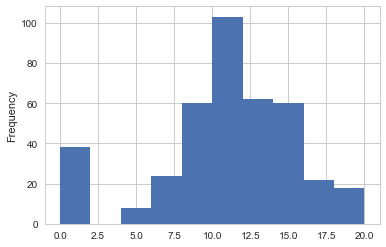

In [6]:
# plot G3 to see the distribution to decide the value for distinguishing class
data_g3['G3'].plot.hist()

In [7]:
data_g3['G3'] = np.where(data_g3['G3']>= 11, 1, 0)
df_y = data_g3['G3']
df_y.head()

0    0
1    0
2    0
3    1
4    0
Name: G3, dtype: int32

### Training and testing sets

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, random_state = 2)

## Neural Networks

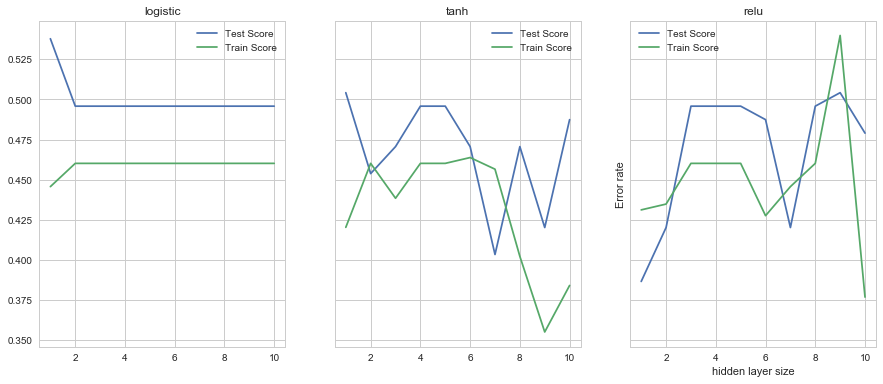

In [19]:
sns.set_style('whitegrid')

fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)



axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (5,4,3), (5,2,5,2), (10), (10,5), (10,5,2), (10,7,3,2), (15,7,2)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test_ann=[]
    error_train_ann=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state=23832)
    
        mlp.fit(X_train, y_train)

        error_test_ann.append(zero_one_loss(y_test, mlp.predict(X_test)))
        error_train_ann.append(zero_one_loss(y_train, mlp.predict(X_train)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_test_ann)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_train_ann)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    plt.xlabel("hidden layer size")
    plt.ylabel("Error rate")
   
    


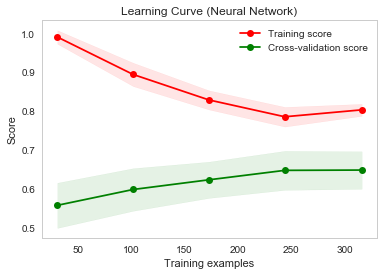

In [24]:
X, y = df_X, df_y


title = "Learning Curve (Neural Network)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=2)

estimator = MLPClassifier(hidden_layer_sizes=(10,5), activation = 'tanh', tol=1e-4, random_state=2)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

### Traing ANN

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(10,5), activation = 'tanh', tol=1e-4, random_state=2)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

### Confusion matrix and Classification report

In [27]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[38 21]
 [19 41]]
             precision    recall  f1-score   support

          0       0.67      0.64      0.66        59
          1       0.66      0.68      0.67        60

avg / total       0.66      0.66      0.66       119



## K Nearest Neighbours

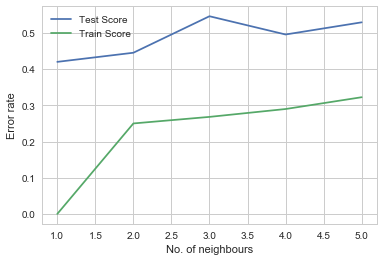

In [34]:
sns.set_style('whitegrid')

kvalue = range(1,6,1)
    
error_test=[]
error_train=[]
for i in range(0, len(kvalue)):
    knn = KNeighborsClassifier(n_neighbors= kvalue[i],p=2)
    knn.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, knn.predict(X_test)))
    error_train.append(zero_one_loss(y_train, knn.predict(X_train)))

    

plt.plot(kvalue, error_test)
plt.plot(kvalue, error_train)
plt.xlabel('No. of neighbours')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [45]:
knn = KNeighborsClassifier(n_neighbors= 2, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [46]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))


[[45 14]
 [39 21]]
             precision    recall  f1-score   support

          0       0.54      0.76      0.63        59
          1       0.60      0.35      0.44        60

avg / total       0.57      0.55      0.53       119



### DATASET 2: ONLINE NEWS POPULARITY

In [47]:
raw_data2 = pd.read_csv("OnlineNewsPopularity.csv")
raw_data2.columns = raw_data2.columns.str.strip()

raw_data2.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [48]:
data2 = raw_data2.drop('url', axis=1)
data2 = data2.drop('timedelta', axis=1)
data2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


(1, 10000)

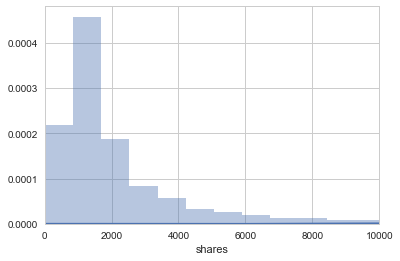

In [49]:
distn = sns.distplot(data2['shares'], bins = 1000)
distn.set_xlim(1, 10000)

In [50]:
data2['shares'] = np.where(data2['shares'] >= 1500, 1, 0)
data2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [51]:
df_X = data2.drop(['shares'],axis=1)
df_X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [52]:
df_y = data2['shares']
df_y.head()

0    0
1    0
2    1
3    0
4    0
Name: shares, dtype: int32

In [53]:
scaler = MinMaxScaler()
scaler.fit(df_X)
df_X =np.array(scaler.transform(df_X))

### Training and testing sets

In [54]:
#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, random_state = 5)
y_train = np.array(y_train).flatten()                               
y_test = np.array(y_test).flatten()

## Neural Networks

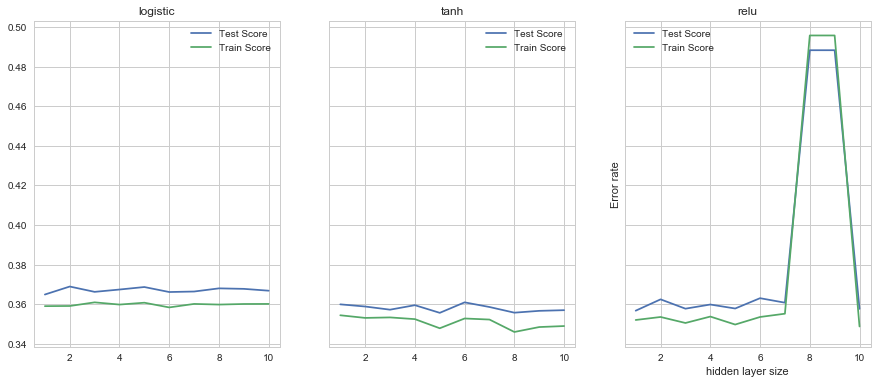

In [55]:
sns.set_style('whitegrid')

fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)



axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (5,4,3), (5,2,5,2), (10), (10,5), (10,5,2), (10,7,3,2), (15,7,2)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test_ann=[]
    error_train_ann=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state=23832)
    
        mlp.fit(X_train, y_train)

        error_test_ann.append(zero_one_loss(y_test, mlp.predict(X_test)))
        error_train_ann.append(zero_one_loss(y_train, mlp.predict(X_train)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_test_ann)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_train_ann)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    plt.xlabel("hidden layer size")
    plt.ylabel("Error rate")

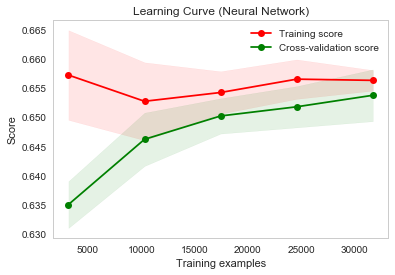

In [63]:
X, y = df_X, df_y


title = "Learning Curve (Neural Network)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)

estimator = MLPClassifier(hidden_layer_sizes=(10,5,2), activation = 'tanh', tol=1e-4, random_state=2)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

### Traing ANN

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(10,5,2), activation = 'tanh', tol=1e-4, random_state=2)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

### Confusion matrix and Classification report

In [65]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[3601 2486]
 [1701 4106]]
             precision    recall  f1-score   support

          0       0.68      0.59      0.63      6087
          1       0.62      0.71      0.66      5807

avg / total       0.65      0.65      0.65     11894



## K Nearest Neighbours

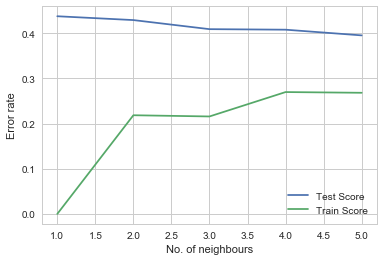

In [71]:
sns.set_style('whitegrid')

kvalue = range(1,6,1)
    
error_test=[]
error_train=[]
for i in range(0, len(kvalue)):
    knn = KNeighborsClassifier(n_neighbors= kvalue[i],p=2)
    knn.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, knn.predict(X_test)))
    error_train.append(zero_one_loss(y_train, knn.predict(X_train)))

    

plt.plot(kvalue, error_test)
plt.plot(kvalue, error_train)
plt.xlabel('No. of neighbours')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [78]:
knn = KNeighborsClassifier(n_neighbors= 10, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [79]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[4347 1740]
 [2860 2947]]
             precision    recall  f1-score   support

          0       0.60      0.71      0.65      6087
          1       0.63      0.51      0.56      5807

avg / total       0.62      0.61      0.61     11894



### End of Code